In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Generate dummy data: 100 images of 64x64 with 3 channels
X = np.random.rand(100, 64, 64, 3)
y = np.random.rand(100, 5)  # 4 for bounding box, 1 for class label (single-class problem)

In [ ]:
input_layer = Input(shape=(64, 64, 3))
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Flatten()(x)

# Output: 4 for bounding box + 1 for class prediction
output = Dense(5)(x)

model = Model(inputs=input_layer, outputs=output)
model.compile(optimizer='adam', loss='mse')  # Use MSE
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 230400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │     1,152,005 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,171,397 (4.47 MB)

 Trainable params: 1,171,397 (4.47 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, epochs=10, batch_size=8)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - loss: 3.4717e-04
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 2.3723e-04
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - loss: 1.0077e-04
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - loss: 4.3102e-05
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 2.2106e-05
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - loss: 1.2655e-05
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 1.2905e-05
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - loss: 4.2581e-06
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 5.3046e-06
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 96ms/step - loss: 2.6368e-06


In [ ]:
test_image = np.random.rand(1, 64, 64, 3)
prediction = model.predict(test_image)

bbox = prediction[0][:4]
class_label = prediction[0][4]

print("Predicted Bounding Box:", bbox)
print("Predicted Class Label:", round(class_label))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Bounding Box: [0.48205602 0.4686357  0.4898322  0.46262422]
Predicted Class Label: 1


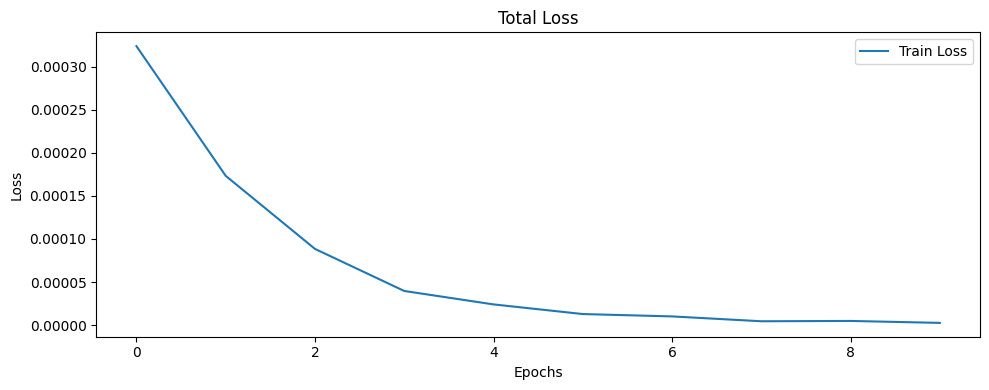

In [ ]:
# Plot losses
plt.figure(figsize=(10, 4))

plt.plot(history.history['loss'], label='Train Loss')
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Total Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()